In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spg.csv")

In [3]:
print(df.shape)

(4213, 21)


In [4]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [5]:
# Import the plotting libraries
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [6]:
# Separating the data.  First four columns as X, and fifth column as Y (PE)
X = df[["temperature_2_m_above_gnd", "relative_humidity_2_m_above_gnd", "mean_sea_level_pressure_MSL", 
        "total_precipitation_sfc", "snowfall_amount_sfc", "total_cloud_cover_sfc", "high_cloud_cover_high_cld_lay",
       "medium_cloud_cover_mid_cld_lay", "low_cloud_cover_low_cld_lay", "shortwave_radiation_backwards_sfc",
       "wind_direction_10_m_above_gnd", "wind_speed_80_m_above_gnd", "wind_direction_80_m_above_gnd",
       "wind_speed_900_mb", "wind_direction_900_mb", "wind_gust_10_m_above_gnd", "angle_of_incidence",
       "zenith", "azimuth"]]
y = df[["generated_power_kw"]]
X.shape, y.shape

((4213, 19), (4213, 1))

In [7]:
# We split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3370, 19)
(843, 19)
(3370, 1)
(843, 1)


In [9]:
corr_matrix = df.corr()
corr_matrix['generated_power_kw'].sort_values(ascending=False)

generated_power_kw                   1.000000
shortwave_radiation_backwards_sfc    0.556148
temperature_2_m_above_gnd            0.217280
mean_sea_level_pressure_MSL          0.150551
snowfall_amount_sfc                 -0.049508
azimuth                             -0.061184
wind_direction_80_m_above_gnd       -0.069941
wind_direction_10_m_above_gnd       -0.073257
wind_direction_900_mb               -0.077435
wind_speed_10_m_above_gnd           -0.083043
wind_speed_900_mb                   -0.107615
total_precipitation_sfc             -0.118442
wind_gust_10_m_above_gnd            -0.122808
high_cloud_cover_high_cld_lay       -0.147723
wind_speed_80_m_above_gnd           -0.157899
medium_cloud_cover_mid_cld_lay      -0.227834
low_cloud_cover_low_cld_lay         -0.288066
total_cloud_cover_sfc               -0.334338
relative_humidity_2_m_above_gnd     -0.336783
angle_of_incidence                  -0.646537
zenith                              -0.649991
Name: generated_power_kw, dtype: f

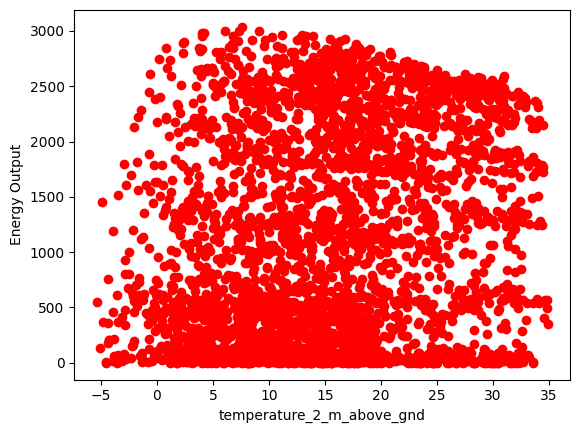

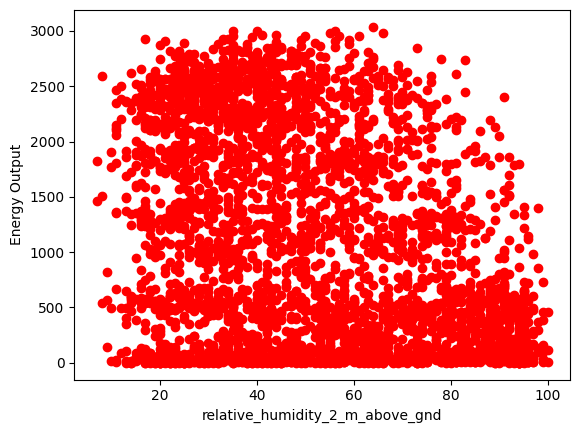

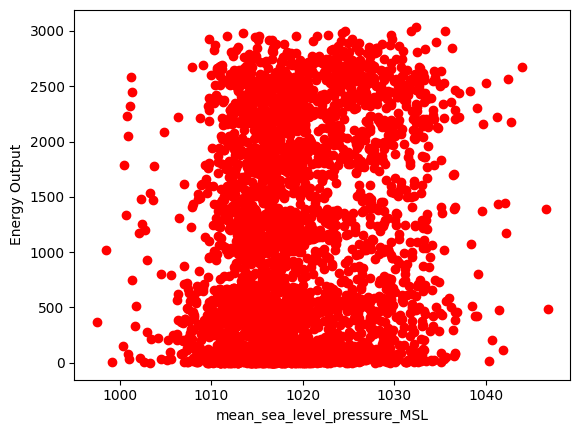

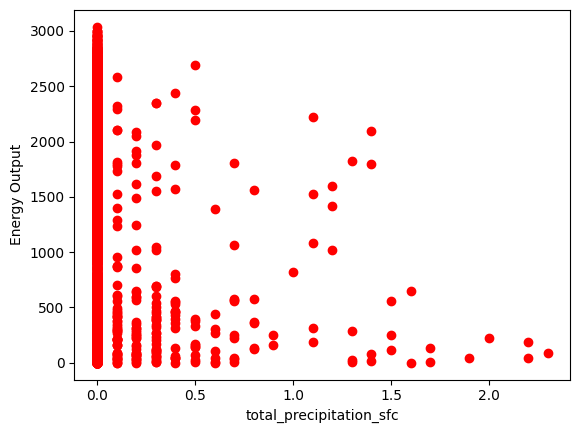

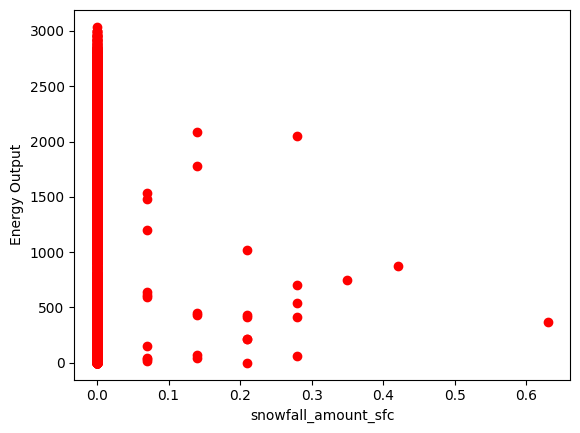

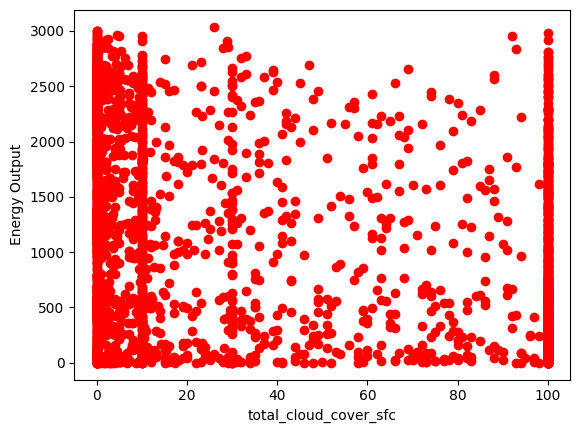

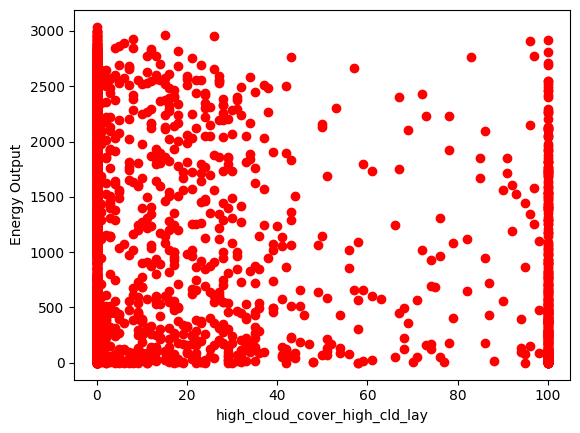

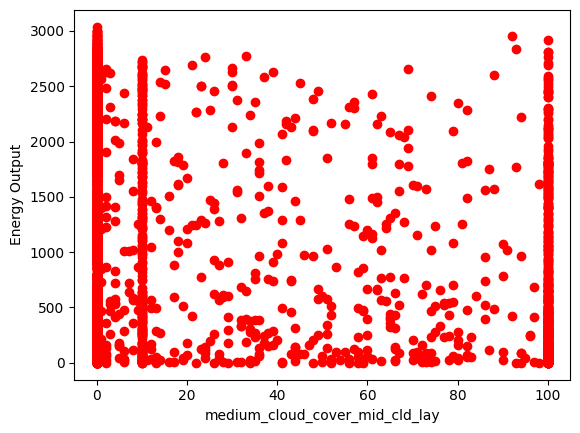

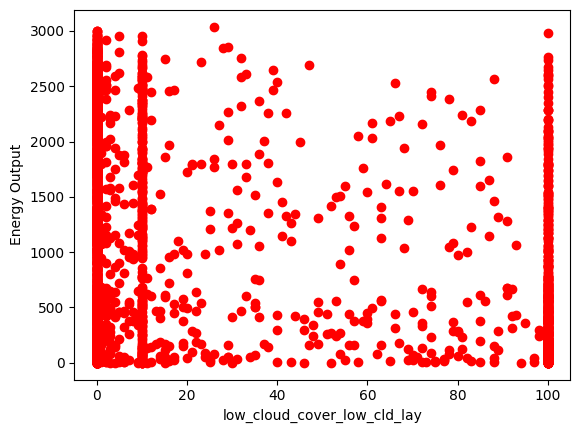

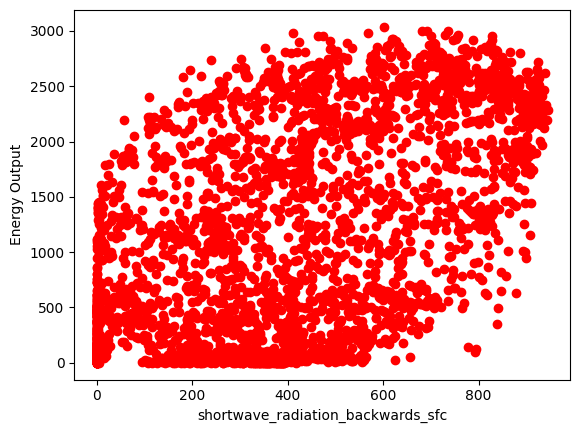

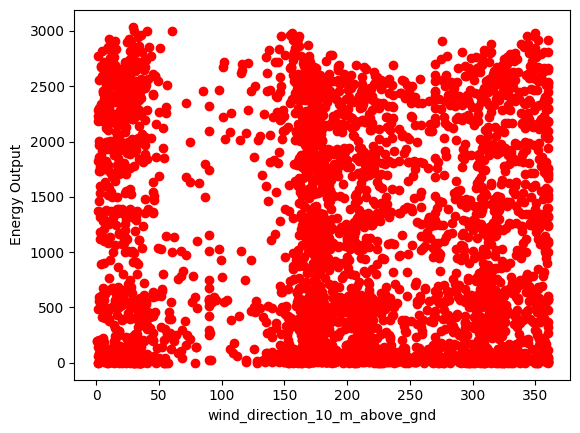

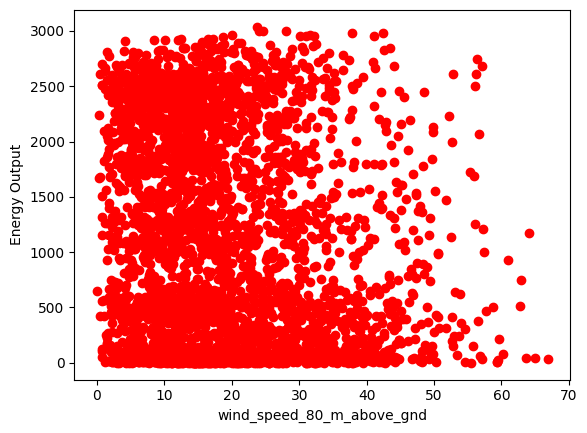

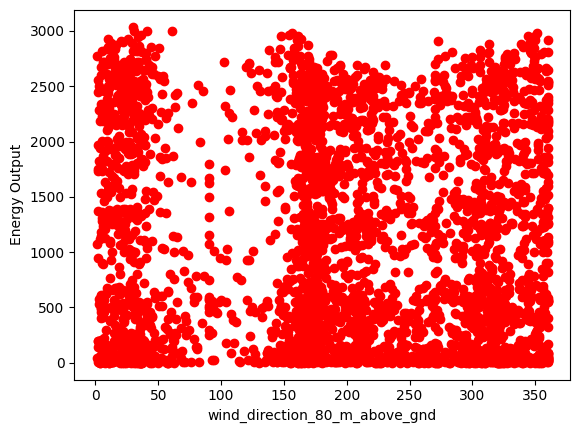

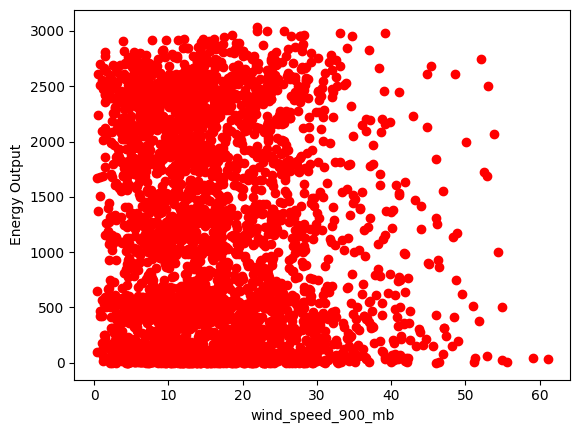

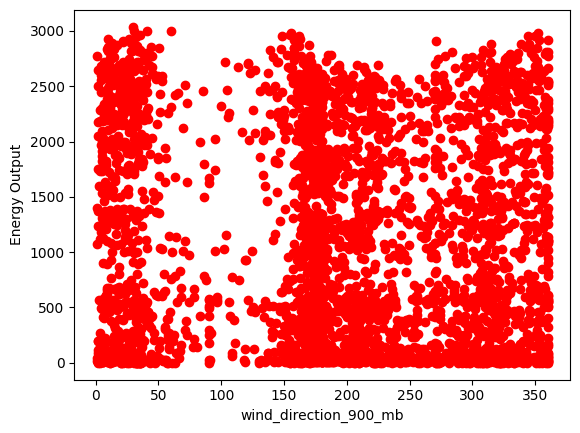

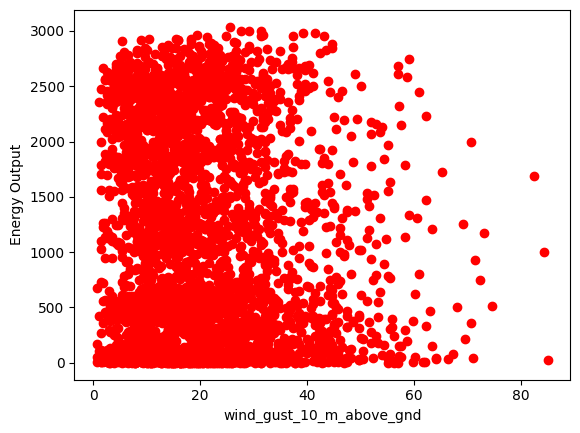

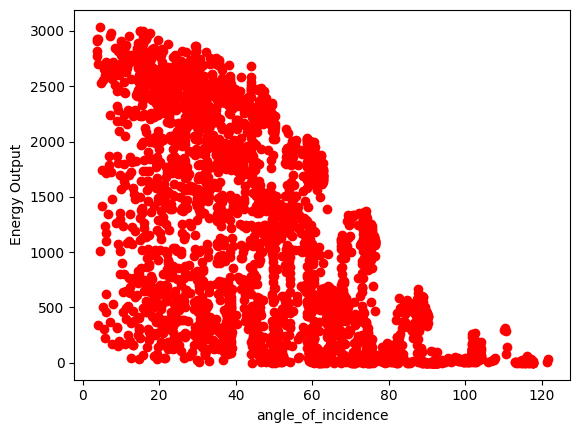

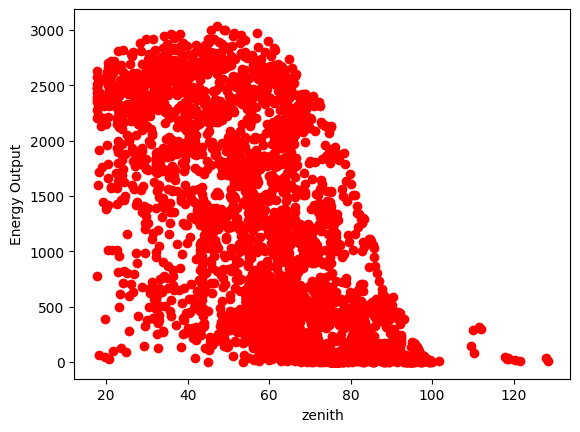

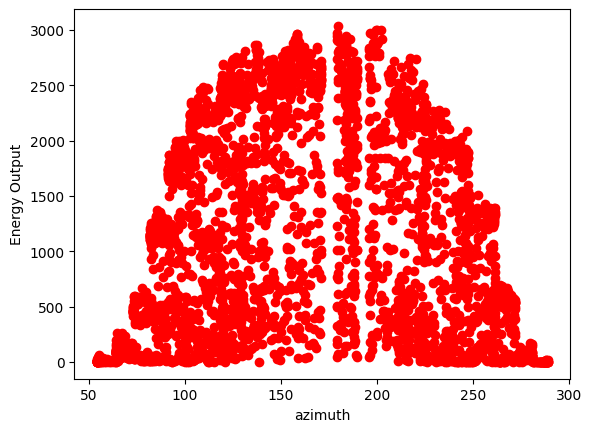

In [10]:
for i in ("temperature_2_m_above_gnd", "relative_humidity_2_m_above_gnd", "mean_sea_level_pressure_MSL", 
        "total_precipitation_sfc", "snowfall_amount_sfc", "total_cloud_cover_sfc", "high_cloud_cover_high_cld_lay",
       "medium_cloud_cover_mid_cld_lay", "low_cloud_cover_low_cld_lay", "shortwave_radiation_backwards_sfc",
       "wind_direction_10_m_above_gnd", "wind_speed_80_m_above_gnd", "wind_direction_80_m_above_gnd",
       "wind_speed_900_mb", "wind_direction_900_mb", "wind_gust_10_m_above_gnd", "angle_of_incidence",
       "zenith", "azimuth"):
    plt.scatter(X_train[[i]], y_train, color='red')
    plt.xlabel(i)
    plt.ylabel('Energy Output')
    plt.show()

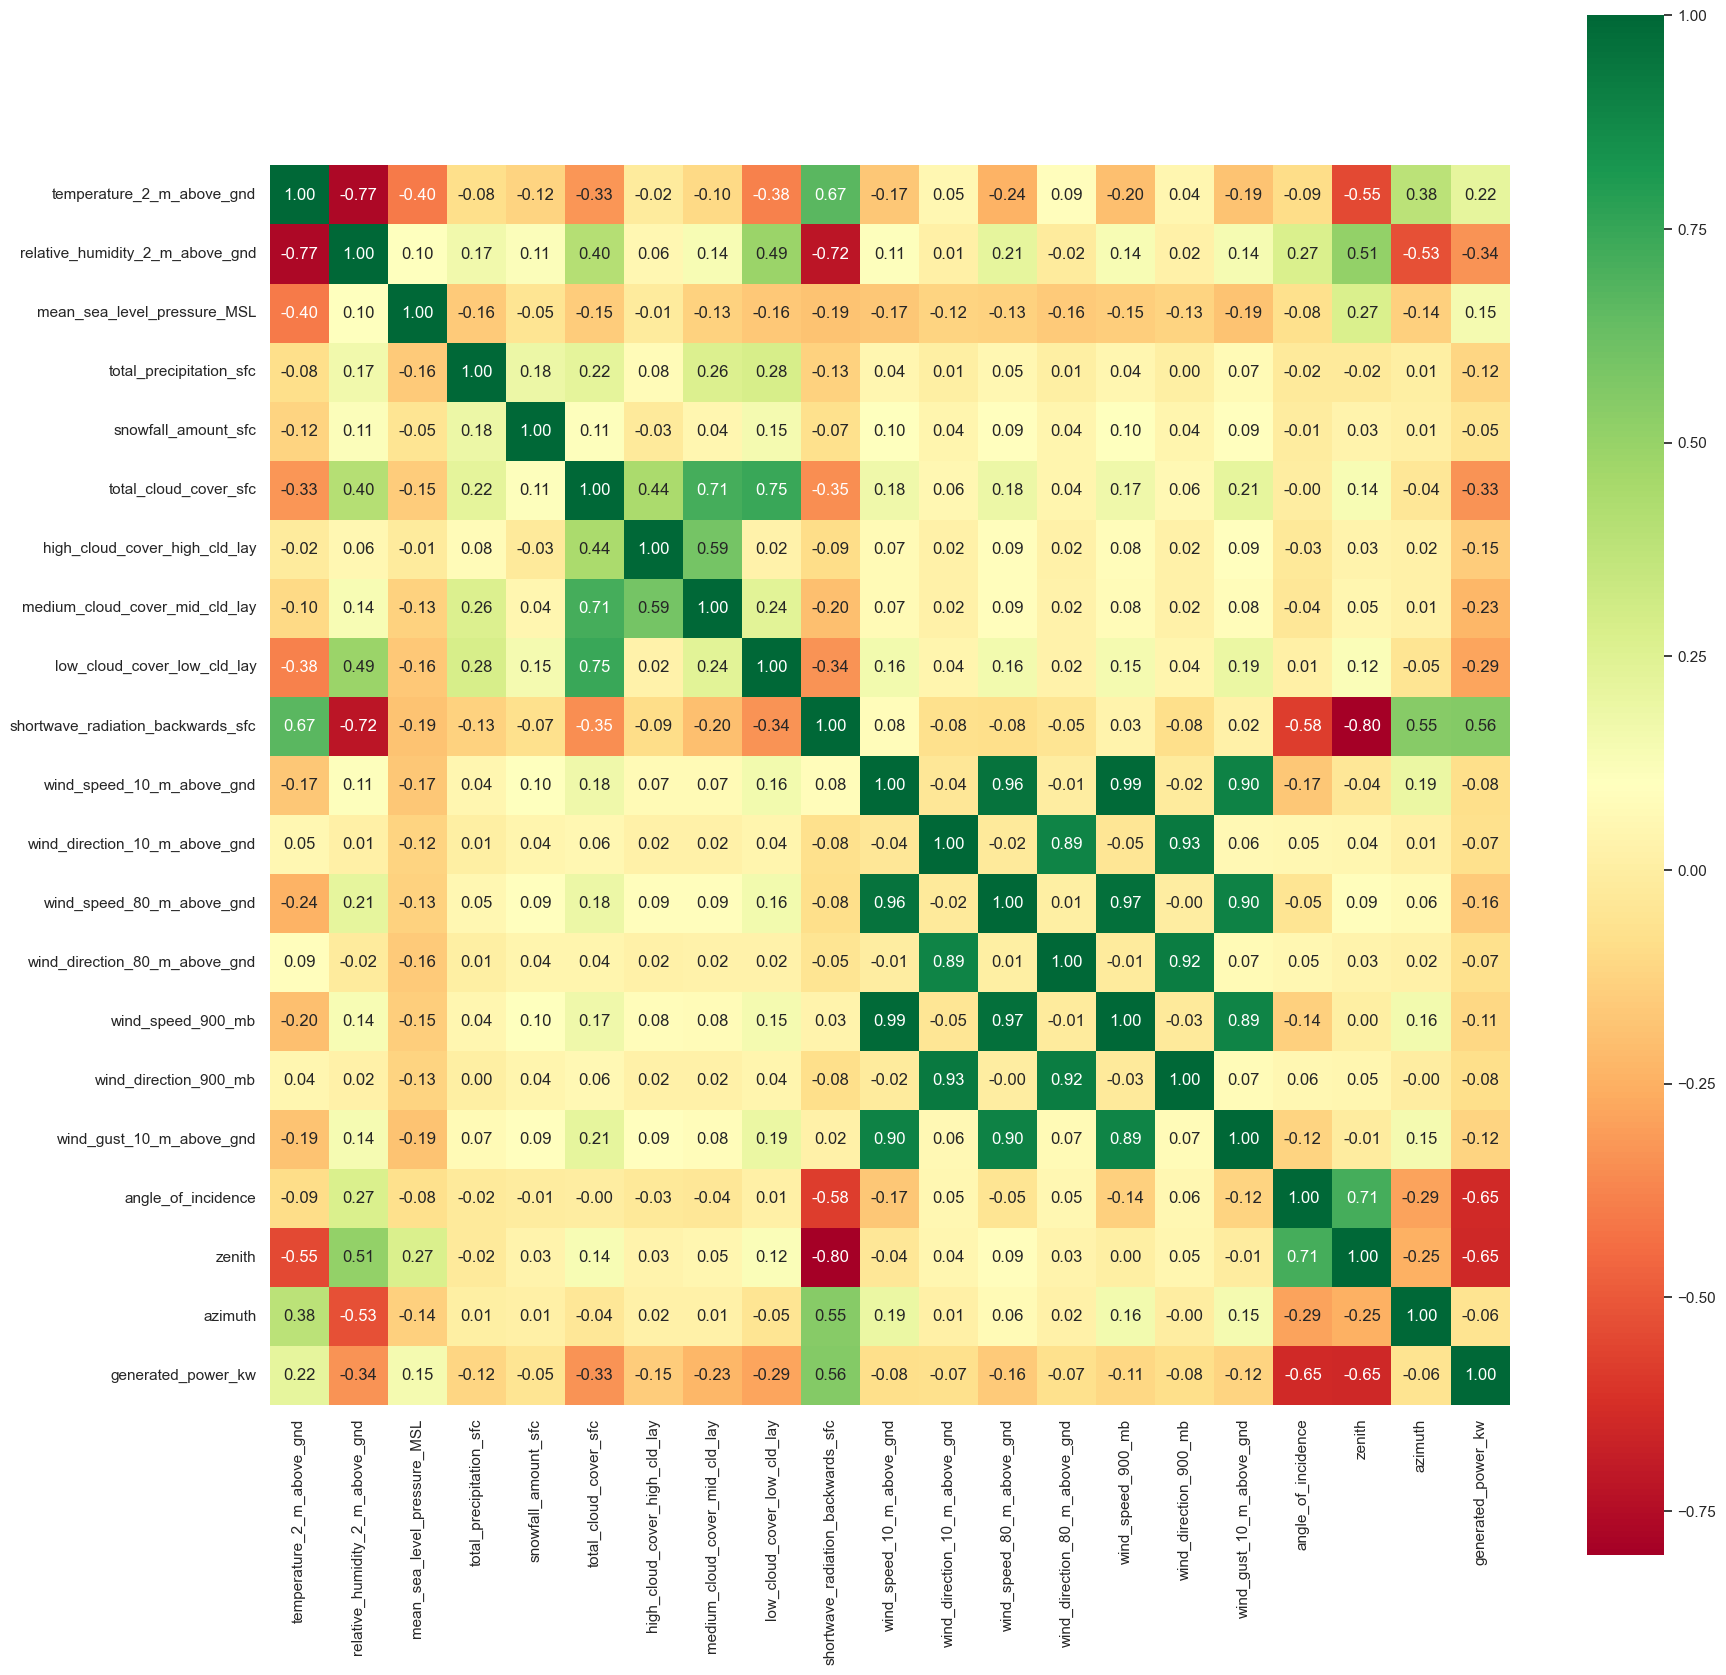

In [11]:
import seaborn as sns
col = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw']
corr = df[col].corr()
plt.figure(figsize = (20,20))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

0.7181143471075176
Coefficients: 
 [[-9.62562046e+00 -4.20184064e+00  1.58725232e+01 -6.97269256e+00
   6.41776987e+02 -1.40904431e+00 -1.26946475e+00 -1.18818300e+00
  -1.34585861e+00  1.26643636e+00  3.08514909e-01  9.24885833e+00
   1.65737703e-01 -1.48906982e+01 -2.63259180e-01 -2.59563933e+00
  -1.50687620e+01 -7.86159359e+00 -6.12630407e+00]]
Root mean squared error: 507.44
Mean absolute error: 391.61
R-squared: 0.72


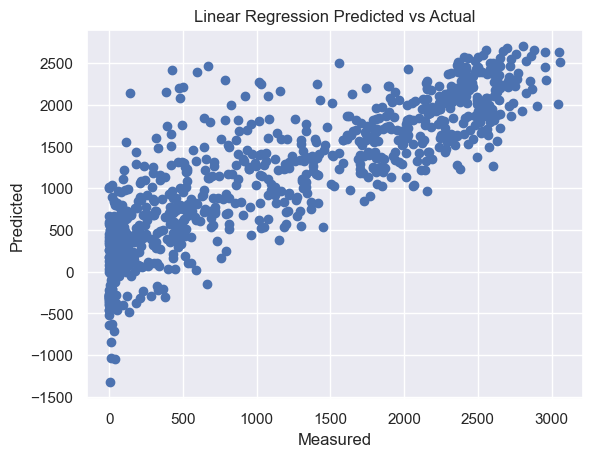

In [12]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
lin_pred = regr.predict(X_test)

linear_regression_score = regr.score(X_test, y_test)
print(linear_regression_score)

from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

C:\Users\pawan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.75550551538391
Root mean squared error: 472.59
Mean absolute error: 335.21
R-squared: 0.76


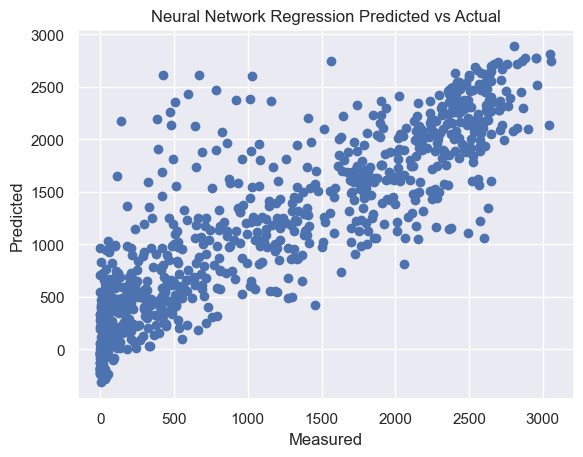

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

# Train the model using the training sets
mlp.fit(X_train, y_train.values.ravel())

# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
print(neural_network_regression_score)

# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

0.8215753514691564
Root mean squared error: 403.71
Mean absolute error: 254.95
R-squared: 0.82
Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_direction_10_m_above_gnd', 'wind_speed_80_m_above_gnd',
       'wind_direction_80_m_above_gnd', 'wind_speed_900_mb',
       'wind_direction_900_mb', 'wind_gust_10_m_above_gnd',
       'angle_of_incidence', 'zenith', 'azimuth'],
      dtype='object')


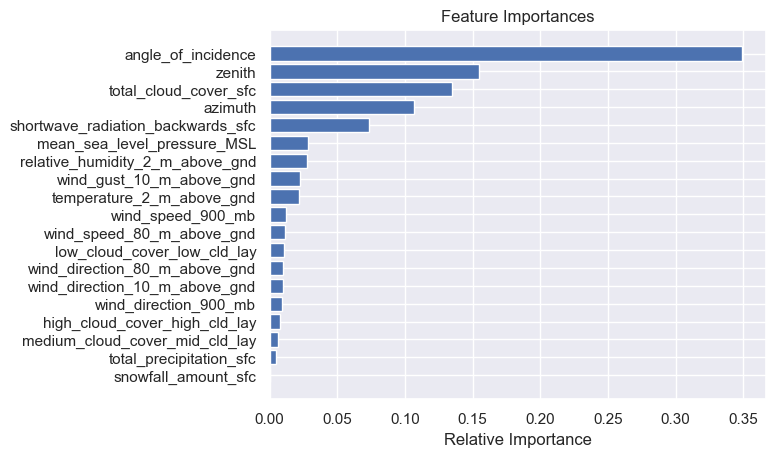

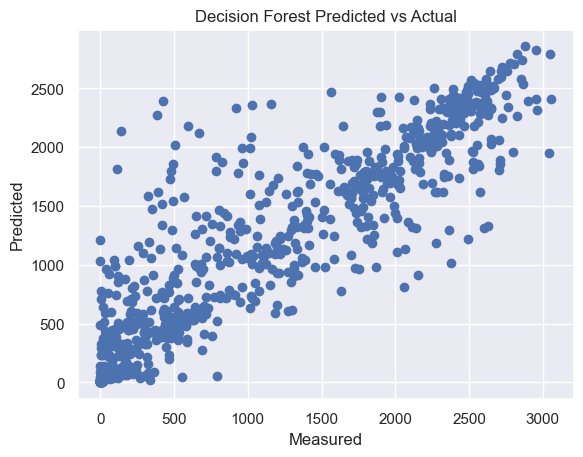

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=0)

# Train the model using the training sets
regr_rf.fit(X_train, y_train.values.ravel())

# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
print(decision_forest_score)

# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

print(X.columns)

features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

0.7190467133538967
Root mean squared error: 506.60


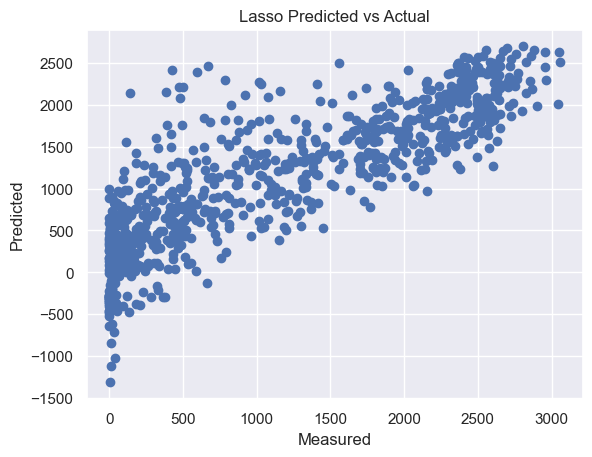

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

# Score the model
lasso_score = lasso.score(X_test, y_test)
print(lasso_score)

# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

In [16]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("Random Forest score: ", decision_forest_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("Random Forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))

Scores:
Linear regression score:  0.7181143471075176
Neural network regression score:  0.753026107930188
Lasso regression score:  0.7190467133538967
Random Forest score:  0.8215753514691564


RMSE:
Linear regression RMSE: 507.44
Neural network RMSE: 474.98
Lasso RMSE: 506.60
Random Forest RMSE: 403.71
